In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/cs-training.csv', index_col=[0])
columns = train.columns.tolist()
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


ID——用户编号  
SeriousDlqin2yrs——好坏客户区分，这里以逾期90天为界，超过90天表示“坏客户”，用1表示是；未超过90天表示“好客户”，用0表示  
RevolvingUtilizationOfUnsecuredLines——贷款以及信用卡可以用额度与总额度比值  
age——借款人的年龄  
NumberOfTime30-59DaysPastDueNotWorse——借款人逾期30-59天但过去两年不是坏账的次数（笔数）  
DebtRatio——负债率，每月要支付的债务、赡养费、生活费占每月总收入的比值  
MonthlyIncome——月收入  
NumberOfOpenCreditLinesAndLoans——贷款和信用卡数量  
NumberOfTimes90DaysLate——逾期90天的次数  
NumberRealEstateLoansOrLines——固定资产贷款数量  
NumberOfTime60-89DaysPastDueNotWorse——逾期60-89天次数  
NumberOfDependents——家属数量  

In [3]:
# columns = {'SeriousDlqin2yrs':'好坏客户',
#         'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
#         'age':'年龄',
#         'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
#         'DebtRatio':'负债率',
#         'MonthlyIncome':'月收入',
#         'NumberOfOpenCreditLinesAndLoans':'信贷数量',
#         'NumberOfTimes90DaysLate':'逾期90天笔数',
#         'NumberRealEstateLoansOrLines':'固定资产贷款量',
#         'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
#         'NumberOfDependents':'家属数量'}
# df.rename(columns=columns, inplace=True)
# df.head()

In [4]:
# 查看数据维度
train.shape
# 查看数据类型和缺失值
train.info()
# 查看标签分布
train['SeriousDlqin2yrs'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

去除重复值

In [5]:
train.drop_duplicates(inplace=True)    # 去重
train.index = range(train.shape[0])    # 重置索引
train.shape

(149391, 11)

In [6]:
# 查看缺失值情况
# print(data.isnull().sum())
train.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

可以看到，MonthlyIncome，缺失比比较高，不能直接删除，利用填充平均值的方法进行补充，NumberOfDependents，缺失比只有2.6%，直接删除

In [7]:
# # 查看缺失值分布形态
# null_list = ['MonthlyIncome', 'NumberOfDependents']
# for col in null_list:
#     plt.style.use('bmh')
#     plt.hist(train[col].dropna().values)
#     plt.show()

In [8]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean(),inplace=True)
train['NumberOfDependents'].fillna(train['NumberOfDependents'].median(), inplace=True)

In [9]:
# # 定义随机森林填补函数
# def fill_missing_rf(X, y, to_fill):
#     """
#     使用随机森林填补一个特征的缺失值的函数
#     参数：
#     x：要填补的特征矩阵
#     y：完整的，没有缺失值的标签
#     to_fill：字符串，要填补的那一列的名称
#     """
#     #构建我们的新特征矩阵和新标签
#     df = X.copy()
#     fill = df.loc[:,to_fill]
#     df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
#     #找出我们的训练集和测试集
#     Ytrain = fill[fill.notnull()]
#     Ytest = fill[fill.isnull()]
#     Xtrain = df.iloc[Ytrain.index,:]
#     Xtest = df.iloc[Ytest.index,:]
    
#     #用随机森林回归来填补缺失值
#     from sklearn.ensemble import RandomForestRegressor as rfr
#     rfr = rfr(n_estimators=100)
#     rfr = rfr.fit(Xtrain, Ytrain)
#     y_pred = rfr.predict(Xtest)
    
#     return y_pred

In [10]:
# X = df.iloc[:,1:]
# y = df['SeriousDlqin2yrs']

# y_pred = fill_missing_rf(X, y, '月收入')
# df.loc[df.loc[:,'月收入'].isnull(), '月收入'] = y_pred

异常值处理

In [11]:
# 描述性统计
train.describe([0.01, 0.1, 0.5, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,50%,90%,99%,max
SeriousDlqin2yrs,145563.0,0.067538,0.250952,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,145563.0,5.941378,250.510835,0.0,0.0,0.003455,0.158817,0.976557,1.093822,50708.0
age,145563.0,52.110701,14.567652,0.0,24.0,33.000000,52.000000,72.000000,86.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,145563.0,0.389185,3.756944,0.0,0.0,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,145563.0,334.548251,1947.228209,0.0,0.0,0.034398,0.359090,1150.000000,4934.380000,329664.0
MonthlyIncome,145563.0,6675.098269,13074.358896,0.0,0.0,2300.000000,6400.000000,10833.000000,23334.380000,3008750.0
NumberOfOpenCreditLinesAndLoans,145563.0,8.553788,5.141132,0.0,0.0,3.000000,8.000000,15.000000,25.000000,58.0
NumberOfTimes90DaysLate,145563.0,0.231309,3.728803,0.0,0.0,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,145563.0,1.033346,1.133115,0.0,0.0,0.000000,1.000000,2.000000,5.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,145563.0,0.205622,3.712455,0.0,0.0,0.000000,0.000000,0.000000,2.000000,98.0


箱线图

In [12]:
# x1=df['可用额度比值']
# x2=df['负债率']
# x3=df['年龄']
# x4=df['逾期30-59天笔数']
# x5=df['逾期60-89天笔数']
# x6=df['逾期90天笔数']
# x7=df['信贷数量']
# x8=df['固定资产贷款量']

# fig=plt.figure(figsize=(20,15))
# ax1=fig.add_subplot(221)
# ax2=fig.add_subplot(222)
# ax3=fig.add_subplot(223)
# ax4=fig.add_subplot(224)

# ax1.boxplot([x1,x2])
# ax1.set_xticklabels(["可用额度比值","负债率"], fontsize=20)

# ax2.boxplot(x3)
# ax2.set_xticklabels("年龄", fontsize=20)

# ax3.boxplot([x4,x5,x6])
# ax3.set_xticklabels(["逾期30-59天笔数","逾期60-89天笔数","逾期90天笔数"], fontsize=20)

# ax4.boxplot([x7,x8])
# ax4.set_xticklabels(["信贷数量","固定资产贷款量"], fontsize=20)

In [13]:
train[train['age'] < 18]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65553,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [14]:
train = train[train['age'] != 0]

In [15]:
# 本赛题定义逾期90天以上就算作坏客户，所以先查看一下这三个逾期指标超过90天的数据
print(train[train['NumberOfTime30-59DaysPastDueNotWorse'] > 90].shape)
print(train[train['NumberOfTime60-89DaysPastDueNotWorse'] > 90].shape)
print(train[train['NumberOfTimes90DaysLate'] > 90].shape)

(208, 11)
(208, 11)
(208, 11)


In [16]:
train[(train['NumberOfTime30-59DaysPastDueNotWorse'] > 90) & 
   (train['NumberOfTime60-89DaysPastDueNotWorse'] > 90) & 
   (train['NumberOfTimes90DaysLate'] > 90)].shape

(208, 11)

In [17]:
# 删除异常数据
train = train[train.loc[:,'NumberOfTime30-59DaysPastDueNotWorse'] < 90]
train['SeriousDlqin2yrs'].value_counts()

0    135648
1      9706
Name: SeriousDlqin2yrs, dtype: int64

分箱

In [18]:
# def auto_bins(df,y,x,p=0.01,max_bin=20,plot=True):
#     """
#     参数
#     df:传入需要进行分箱的数据集
#     y:标签名
#     x:进行分箱的特征名
#     p:叶子包含观测数的最小占比(0<p<0.5)，默认为0.01
#     max_bin:最大箱子数(大于2)，默认为20
#     plot:是否画WOE图
#     """
#     from sklearn.tree import DecisionTreeClassifier
#     from sklearn.model_selection import GridSearchCV
#     import numpy as np
#     import pandas as pd
    
#     # 指明X和Y变量数据,排除NA值
#     X = np.array(df[x][df[x].notna()]).reshape(-1,1)
#     Y = df[y][df[x].notna()]
   
#     # 调参,得到最合适的叶节点观测占比
#     gini_impure = np.linspace(0,0.001,50)
#     param_grid = {"min_impurity_decrease":gini_impure}
#     Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,iid=False)
#     Es.fit(X,Y)
    
#     # 使用最优参数构建树模型
#     ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
#                                 max_leaf_nodes = max_bin,
#                                 min_samples_leaf = p)    
#     ES.fit(X,Y)
    
#     # 输出树结构
#     TS = tree_structure(ES,x)
    
#     # 抽取测试节点的阈值
#     TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
#     # 计算最优分割点
#     CP = np.append(TH,np.array([X.max(),X.min()]))
#     CP.sort()
    
#     # 使用自定义分箱函数
#     smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
    
#     out_a = pd.Series({"Tree_structure":TS})
    
#     out = smbin_cust.append(out_a)

#     return(out)

In [19]:
# # 可用额度比值
# cut1 = auto_bins(data, '好坏客户', '可用额度比值')

In [20]:
from sklearn.model_selection import train_test_split
X_train = train.drop(columns = ['SeriousDlqin2yrs'])
Y_train = train['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# model = XGBClassifier(tree_method = 'gpu_exact')
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [22]:
Y_pred = model.predict(X_train)
print("The accuracy score is : ", accuracy_score(Y_train, Y_pred)*100, "%")
print(confusion_matrix(Y_train, Y_pred))

The Accuracy score is :  93.76625342267843 %
[[134545   1103]
 [  7958   1748]]


In [23]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

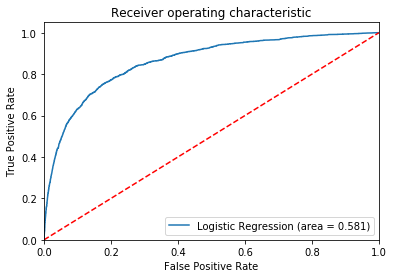

0.5809725159964194

In [24]:
# Plot the ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
roc_auc_score(y_test, model.predict(x_test))

In [25]:
# from sklearn.model_selection import KFold, cross_val_score
# kf = KFold(n_splits=5, random_state=None) 
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
# print(np.mean(cross_val_score(model, X, y.values.ravel(), cv=10))*100)

In [26]:
test = pd.read_csv('../data/cs-test.csv')
test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [27]:
print(test.isnull().mean())

Unnamed: 0                              0.000000
SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198053
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025871
dtype: float64


In [28]:
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(), inplace=True)

In [29]:
x_test = test.drop(columns = ['Unnamed: 0', 'SeriousDlqin2yrs'])

In [30]:
preds = model.predict_proba(x_test)
submission = pd.DataFrame({'Id': test['Unnamed: 0'], 'Probability': preds[:, 1]})
submission.to_csv('submission.csv', index = None, header=True)
print(submission.shape)
submission.head()

(101503, 2)


,Id,Probability
0,1,0.080037
1,2,0.050100
2,3,0.014760
3,4,0.074742
4,5,0.101496


In [31]:
train.to_csv('analyze.csv', index = None)